In [69]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import plotly
import cufflinks as cf
cf.go_offline()

In [5]:
start = datetime.datetime(2006,1,1)
end = datetime.datetime(2016,1,1)

In [7]:
#read data Bank of America
BAC = data.DataReader('BAC', 'stooq', start, end) #https://pandas-datareader.readthedocs.io/en/latest/remote_data.html

In [8]:
BAC

,Open,High,Low,Close,Volume
Date,,,,,
2015-12-31,14.7814,14.8325,14.6233,14.6233,5.417059e+07
2015-12-30,14.9473,14.9807,14.8070,14.8168,4.030734e+07
2015-12-29,14.9897,15.0780,14.9130,15.0131,5.251059e+07
2015-12-28,14.9630,14.9720,14.7539,14.8846,4.803435e+07
2015-12-24,15.0495,15.1035,14.9630,15.0063,3.380344e+07
...,...,...,...,...,...
2006-01-09,39.3182,39.5294,39.0158,39.2181,1.855918e+07
2006-01-06,39.3850,39.4774,39.0089,39.1917,1.496529e+07
2006-01-05,39.2004,39.4126,38.9834,39.2525,1.761312e+07


In [11]:
#citigroup
C = data.DataReader('C', 'stooq', start, end)
#goldman sachs
GS = data.DataReader('GS', 'stooq', start, end)
#JP Morgan chase
JPM = data.DataReader('JPM', 'stooq', start, end)
#Morgan Stanley
MS = data.DataReader('MS', 'stooq', start, end)
#Wells Fargo
WFC = data.DataReader('WFC', 'stooq', start, end)

In [12]:
MS

,Open,High,Low,Close,Volume
Date,,,,,
2015-12-31,26.6023,26.9300,26.4865,26.5229,9.773893e+06
2015-12-30,27.0998,27.2194,26.8476,26.8721,6.065510e+06
2015-12-29,27.0448,27.2656,26.9506,27.1380,7.661993e+06
2015-12-28,26.9820,26.9820,26.6377,26.8211,6.501028e+06
2015-12-24,27.1547,27.2734,27.0448,27.0811,3.356089e+06
...,...,...,...,...,...
2006-01-09,38.4470,38.8846,38.4412,38.8120,5.246244e+06
2006-01-06,38.5432,38.5922,38.0703,38.4108,8.721337e+06
2006-01-05,38.2675,38.4264,38.0448,38.3715,7.313990e+06


In [13]:
#create a list of the ticker symbols(as strings) in alphabetical order. 
tickers = ['BAC','C','GS','JPM','MS','WFC']
#concatenate the bank dataframes together to a single data frame
bank_stocks = pd.concat([BAC,C,GS,JPM,MS,WFC],axis=1,keys=tickers)

In [14]:
bank_stocks.head()

BAC                                                 C  \
               Open     High      Low    Close        Volume     Open   
Date                                                                    
2006-01-03  39.4871  39.7023  38.8390  39.6217  1.936396e+07  405.492   
2006-01-04  39.5549  39.7592  39.0904  39.2004  2.110031e+07  404.358   
2006-01-05  39.2004  39.4126  38.9834  39.2525  1.761312e+07  400.843   
2006-01-06  39.3850  39.4774  39.0089  39.1917  1.496529e+07  404.504   
2006-01-09  39.3182  39.5294  39.0158  39.2181  1.855918e+07  402.174   

                                                     ...       MS           \
               High      Low    Close        Volume  ...     Open     High   
Date                                                 ...                     
2006-01-03  408.615  398.112  407.891  1.858097e+06  ...  37.4934  38.3558   
2006-01-04  406.325  400.089  400.354  2.260921e+06  ...  38.4971  38.8778   
2006-01-05  403.663  400.520  402.321  1.371893e+06  ...  38.2675  38.4264   
2006-01-06  404.641  398.865  402.321  1.655812e+06  ...  38.5432  38.5922   
2006-01-09  403.329  399.678  400.432  2.031072e+06  ...  38.4470  38.8846   

                                                WFC                    \
                Low    Close        Volume     Open     High      Low   
Date                                                                    
2006-01-03  37.2060  38.2361  6.806387e+06  22.7430  23.0144  22.4559   
2006-01-04  38.2675  38.2675  1.009857e+07  22.8831  22.8979  22.5683   
2006-01-05  38.0448  38.3715  7.313990e+06  22.6690  22.7055  22.5308   
2006-01-06  38.0703  38.4108  8.721337e+06  22.7302  22.8643  22.5920   
2006-01-09  38.4412  38.8120  5.246244e+06  22.7983  22.8979  22.7055   

                                   
              Close        Volume  
Date                               
2006-01-03  22.9581  1.530724e+07  
2006-01-04  22.6917  1.510382e+07  
2006-01-05  22.6690  1.407726e+07  
2006-01-06  22.7983  1.167705e+07  
2006-01-09  22.7983  7.808415e+06  

[5 rows x 30 columns]

In [15]:
#set the column name levels
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

In [21]:
bank_stocks.head()

Bank Ticker      BAC                                                 C  \
Stock Info      Open     High      Low    Close        Volume     Open   
Date                                                                     
2006-01-03   39.4871  39.7023  38.8390  39.6217  1.936396e+07  405.492   
2006-01-04   39.5549  39.7592  39.0904  39.2004  2.110031e+07  404.358   
2006-01-05   39.2004  39.4126  38.9834  39.2525  1.761312e+07  400.843   
2006-01-06   39.3850  39.4774  39.0089  39.1917  1.496529e+07  404.504   
2006-01-09   39.3182  39.5294  39.0158  39.2181  1.855918e+07  402.174   

Bank Ticker                                           ...       MS           \
Stock Info      High      Low    Close        Volume  ...     Open     High   
Date                                                  ...                     
2006-01-03   408.615  398.112  407.891  1.858097e+06  ...  37.4934  38.3558   
2006-01-04   406.325  400.089  400.354  2.260921e+06  ...  38.4971  38.8778   
2006-01-05   403.663  400.520  402.321  1.371893e+06  ...  38.2675  38.4264   
2006-01-06   404.641  398.865  402.321  1.655812e+06  ...  38.5432  38.5922   
2006-01-09   403.329  399.678  400.432  2.031072e+06  ...  38.4470  38.8846   

Bank Ticker                                      WFC                    \
Stock Info       Low    Close        Volume     Open     High      Low   
Date                                                                     
2006-01-03   37.2060  38.2361  6.806387e+06  22.7430  23.0144  22.4559   
2006-01-04   38.2675  38.2675  1.009857e+07  22.8831  22.8979  22.5683   
2006-01-05   38.0448  38.3715  7.313990e+06  22.6690  22.7055  22.5308   
2006-01-06   38.0703  38.4108  8.721337e+06  22.7302  22.8643  22.5920   
2006-01-09   38.4412  38.8120  5.246244e+06  22.7983  22.8979  22.7055   

Bank Ticker                         
Stock Info     Close        Volume  
Date                                
2006-01-03   22.9581  1.530724e+07  
2006-01-04   22.6917  1.510382e+07  
2006-01-05   22.6690  1.407726e+07  
2006-01-06   22.7983  1.167705e+07  
2006-01-09   22.7983  7.808415e+06  

[5 rows x 30 columns]

In [23]:
#max close pricee for each bank's stock throughout the time period
for tick in tickers:
    print(tick, bank_stocks[tick]['Close'].max())

BAC 46.2013
C 466.812
GS 203.691
JPM 57.1634
MS 58.5624
WFC 47.0925


In [25]:
bank_stocks.xs(key='Close',axis=1, level='Stock Info').max()

Bank Ticker
BAC     46.2013
C      466.8120
GS     203.6910
JPM     57.1634
MS      58.5624
WFC     47.0925
dtype: float64

In [27]:
#return for each bank stock
returns = pd.DataFrame()

In [29]:
#use pandas pct_change() method on Close column to create a column representing the return value. 
for tick in tickers:
    returns[tick + 'Return'] = bank_stocks[tick]['Close'].pct_change(fill_method=None)

In [31]:
returns.head()

,BACReturn,CReturn,GSReturn,JPMReturn,MSReturn,WFCReturn
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010633,-0.018478,-0.013704,-0.014304,0.000821,-0.011604
2006-01-05,0.001329,0.004913,-0.000364,0.003130,0.002718,-0.001000
2006-01-06,-0.001549,0.000000,0.013995,0.007061,0.001024,0.005704
2006-01-09,0.000674,-0.004695,0.012026,0.016240,0.010445,0.000000


In [33]:
#create pairplott using seaborn of the return dataframe
sns.pairplot(returns[1:])

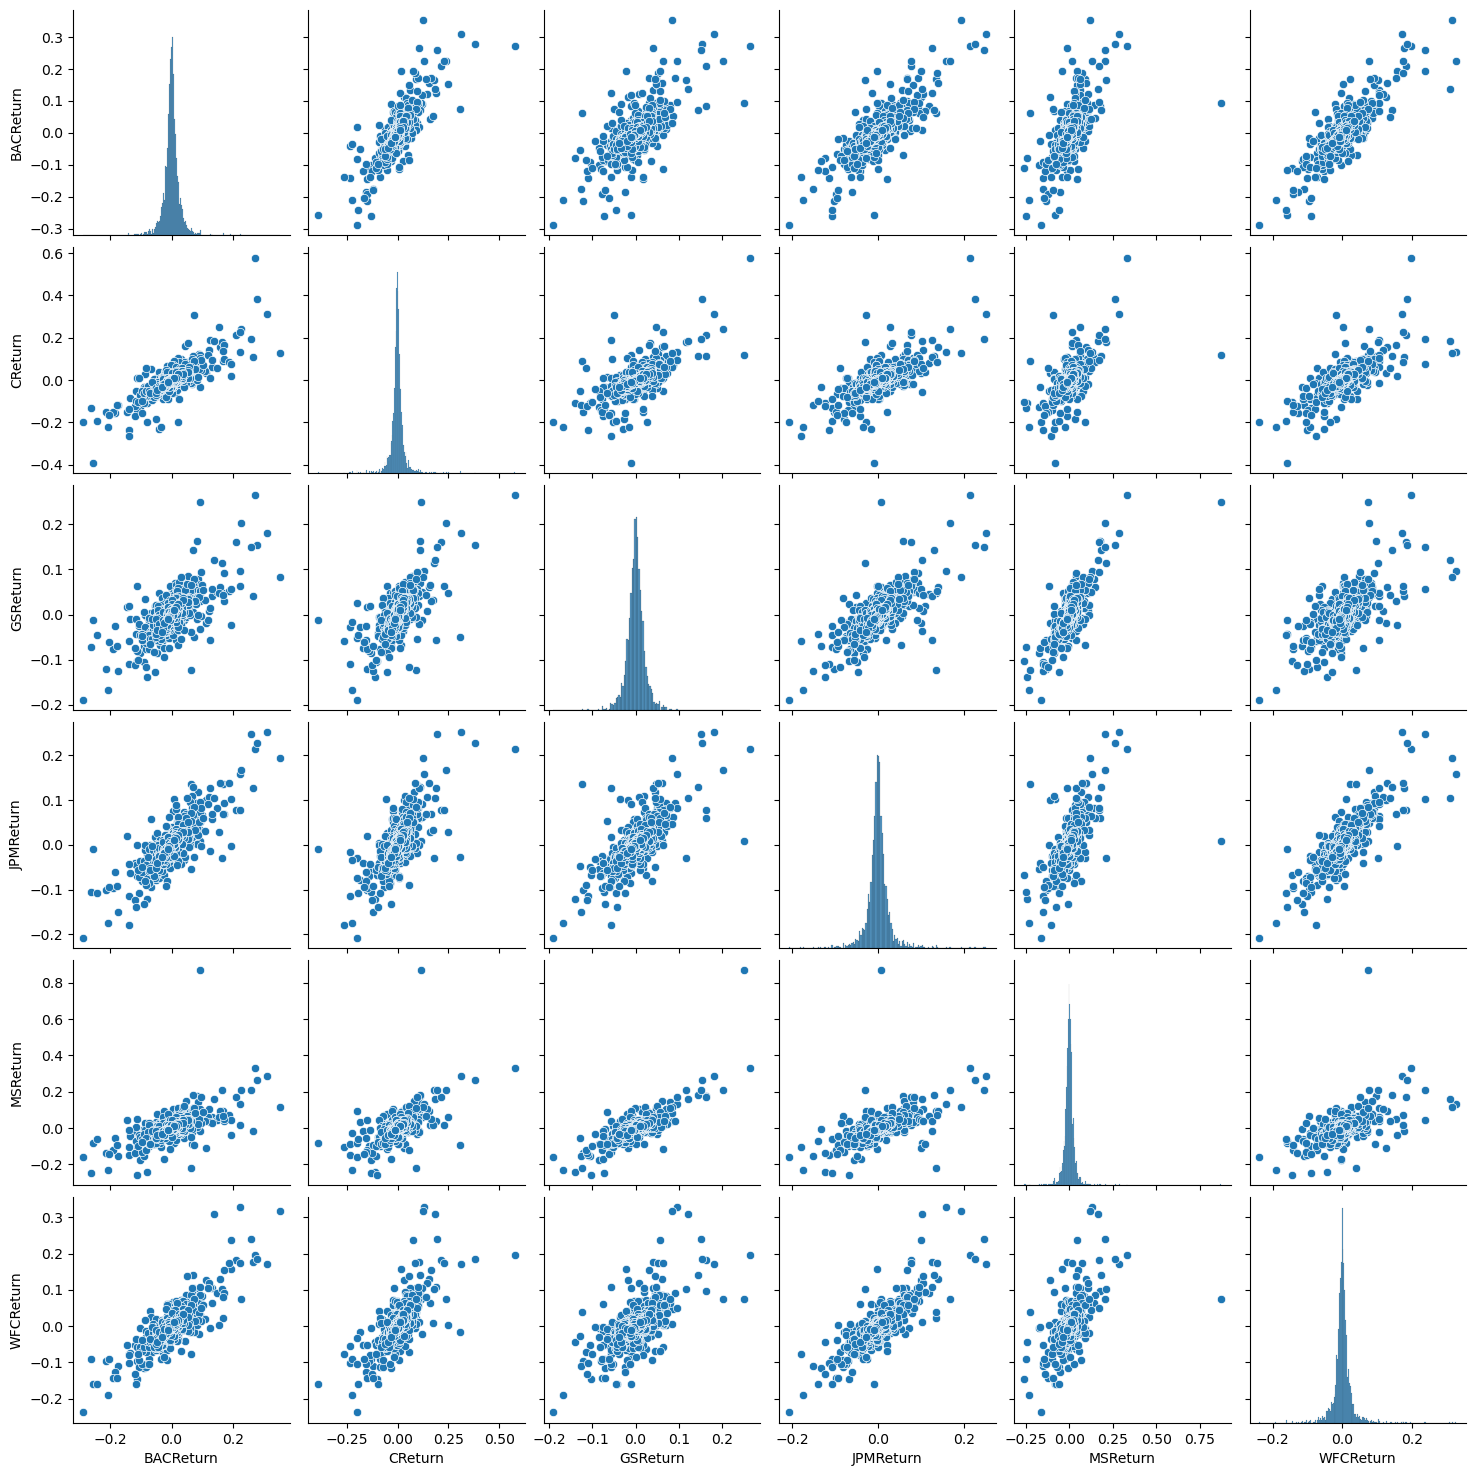

In [34]:
plt.show()

In [36]:
#figure out on what dates each bank stock had the best and worst single day returns. 
returns.head()

,BACReturn,CReturn,GSReturn,JPMReturn,MSReturn,WFCReturn
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010633,-0.018478,-0.013704,-0.014304,0.000821,-0.011604
2006-01-05,0.001329,0.004913,-0.000364,0.003130,0.002718,-0.001000
2006-01-06,-0.001549,0.000000,0.013995,0.007061,0.001024,0.005704
2006-01-09,0.000674,-0.004695,0.012026,0.016240,0.010445,0.000000


In [39]:
returns.min()

BACReturn   -0.289669
CReturn     -0.390279
GSReturn    -0.189581
JPMReturn   -0.207415
MSReturn    -0.258721
WFCReturn   -0.238398
dtype: float64

In [41]:
returns['BACReturn'].argmin()

766

In [43]:
returns.idxmin()

BACReturn   2009-01-20
CReturn     2009-02-27
GSReturn    2009-01-20
JPMReturn   2009-01-20
MSReturn    2008-10-09
WFCReturn   2009-01-20
dtype: datetime64[ns]

In [47]:
returns.idxmax()

BACReturn   2009-04-09
CReturn     2008-11-24
GSReturn    2008-11-24
JPMReturn   2009-01-21
MSReturn    2008-10-13
WFCReturn   2008-07-16
dtype: datetime64[ns]

In [49]:
#standard deviation of the returns, which stock would you classify as the riskest over the entire time period? which would you classify as the riskiest for the  year 2015?
returns.std()

BACReturn    0.036605
CReturn      0.038615
GSReturn     0.025371
JPMReturn    0.027670
MSReturn     0.037723
WFCReturn    0.030221
dtype: float64

In [51]:
returns.head()

,BACReturn,CReturn,GSReturn,JPMReturn,MSReturn,WFCReturn
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010633,-0.018478,-0.013704,-0.014304,0.000821,-0.011604
2006-01-05,0.001329,0.004913,-0.000364,0.003130,0.002718,-0.001000
2006-01-06,-0.001549,0.000000,0.013995,0.007061,0.001024,0.005704
2006-01-09,0.000674,-0.004695,0.012026,0.016240,0.010445,0.000000


In [55]:
returns.loc['2015-01-01':'2015-12-31'].std()

BACReturn    0.016149
CReturn      0.015280
GSReturn     0.014028
JPMReturn    0.013964
MSReturn     0.016006
WFCReturn    0.012545
dtype: float64

In [63]:
#create a distplot using seaborn of the 2015 returns for Morgan stanley- distplot is deprecated so using hisplot
sns.histplot(returns.loc['2015-01-01':'2015-12-31']['MSReturn'],color='green',bins=50)

<Axes: xlabel='MSReturn', ylabel='Count'>

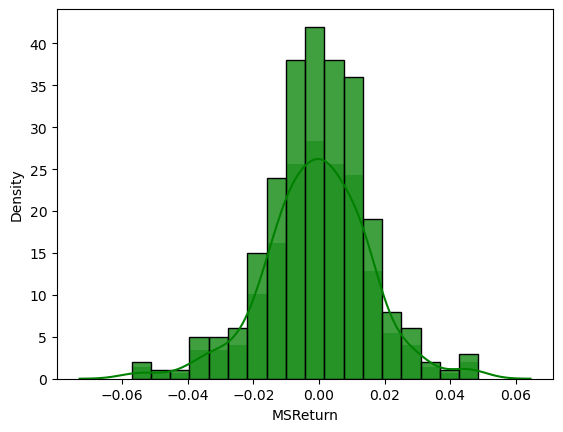

In [61]:
plt.show()

In [65]:
#create a distplot using seaborn of the 2008 returns for citigroup 
sns.histplot(returns.loc['2008-01-01':'2008-12-31']['CReturn'],color='red',bins=50)

<Axes: xlabel='MSReturn', ylabel='Count'>

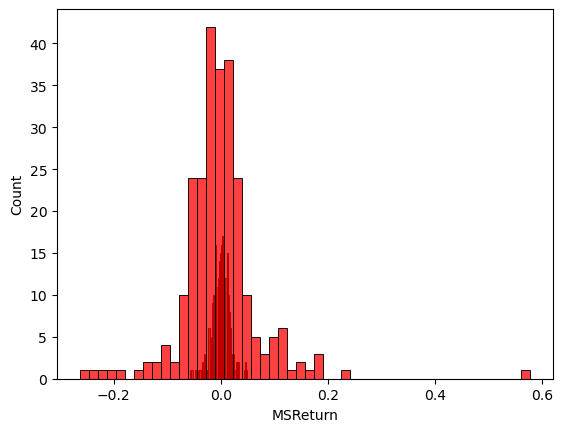

In [67]:
plt.show()

In [71]:
#create a line plot showing the closing price for each bank for the entire index of time
for tick in tickers:
    bank_stocks[tick]['Close'].plot(label=tick,figsize=(12,4))
plt.legend()

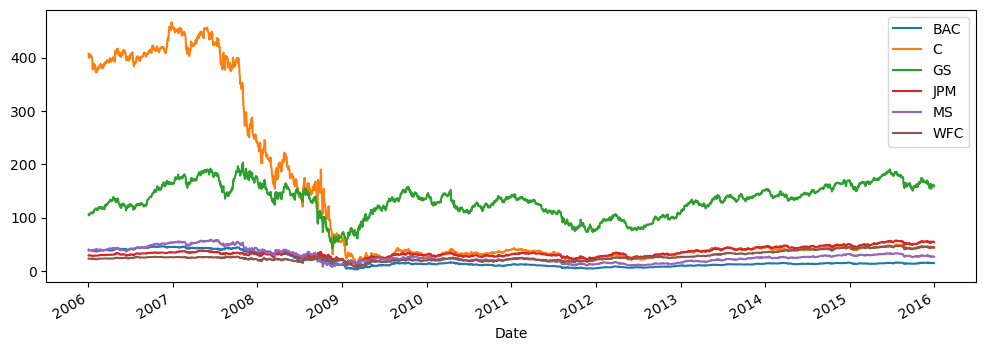

In [73]:
plt.show()

In [75]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info')

Bank Ticker,BAC,C,GS,JPM,MS,WFC
Date,,,,,,
2006-01-03,39.6217,407.8910,105.883,28.9771,38.2361,22.9581
2006-01-04,39.2004,400.3540,104.432,28.5626,38.2675,22.6917
2006-01-05,39.2525,402.3210,104.394,28.6520,38.3715,22.6690
2006-01-06,39.1917,402.3210,105.855,28.8543,38.4108,22.7983
2006-01-09,39.2181,400.4320,107.128,29.3229,38.8120,22.7983
...,...,...,...,...,...,...
2015-12-24,15.0063,43.9089,160.353,54.7162,27.0811,44.7054
2015-12-28,14.8846,43.6347,159.599,54.5364,26.8211,44.5949
2015-12-29,15.0131,44.1369,161.264,55.0983,27.1380,45.0893


In [77]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').plot()

<Axes: xlabel='Date'>

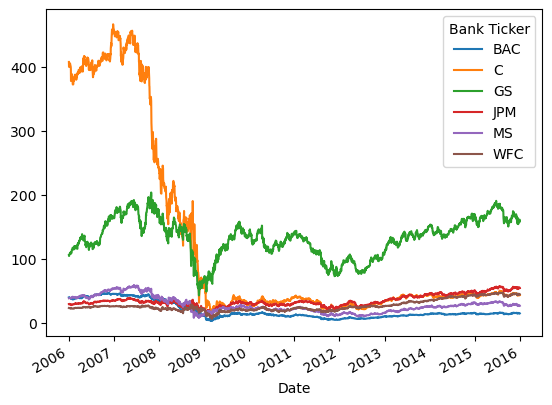

In [79]:
plt.show()

/opt/anaconda3/lib/python3.12/site-packages/cufflinks/plotlytools.py:117: FutureWarning:

DatetimeIndex.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.



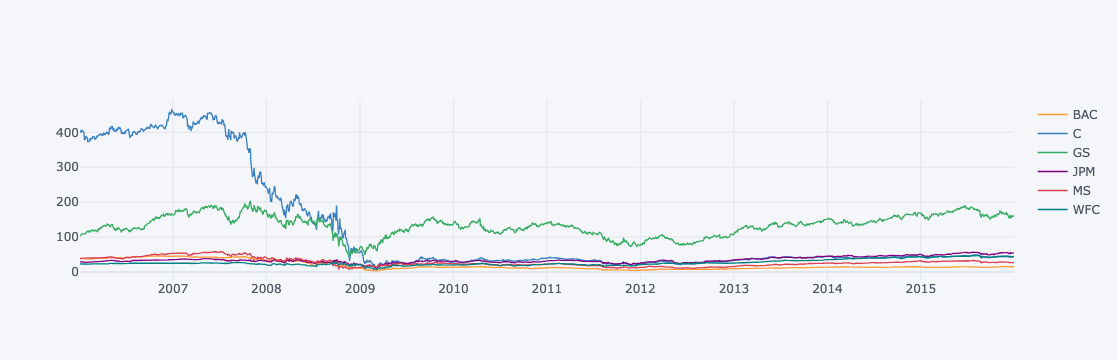

In [81]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').iplot()

In [83]:
#moving averages for these stock in the year 2008
#plot the rolling 30 days average against the close price for the bank of America's stock for the year 2008
BAC.head()

,Open,High,Low,Close,Volume
Date,,,,,
2015-12-31,14.7814,14.8325,14.6233,14.6233,5.417059e+07
2015-12-30,14.9473,14.9807,14.8070,14.8168,4.030734e+07
2015-12-29,14.9897,15.0780,14.9130,15.0131,5.251059e+07
2015-12-28,14.9630,14.9720,14.7539,14.8846,4.803435e+07
2015-12-24,15.0495,15.1035,14.9630,15.0063,3.380344e+07


In [99]:
BAC = BAC.sort_index() #https://stackoverflow.com/questions/76906594/value-based-partial-slicing-on-non-monotonic-datetimeindexes-with-non-existing-k

plt.figure(figsize=(12,4))
BAC['Close'].loc['2008-01-01':'2009-01-01'].rolling(window=30).mean().plot(label='30 day moving avg')
BAC['Close'].loc['2008-01-01':'2009-01-01'].plot(label='BAC Close')
plt.legend()

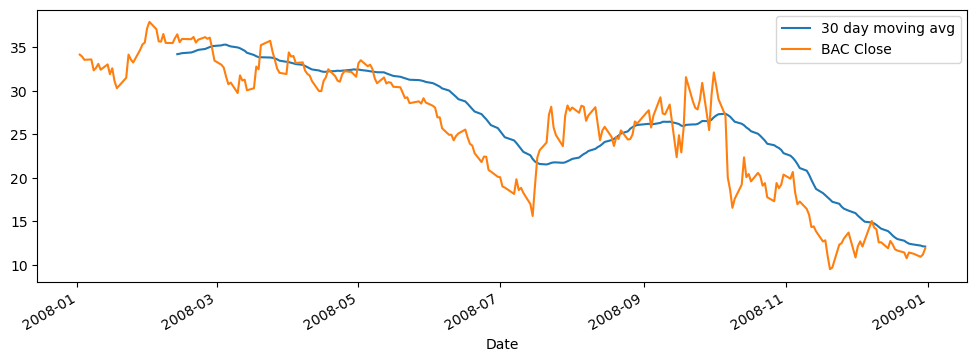

In [101]:
plt.show()

In [103]:
#create a heatmap of the correlation between the stocks close price
bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr()

Bank Ticker,BAC,C,GS,JPM,MS,WFC
Bank Ticker,,,,,,
BAC,1.000000,0.970862,0.499725,0.019835,0.927576,-0.038152
C,0.970862,1.000000,0.376065,-0.081897,0.888668,-0.121581
GS,0.499725,0.376065,1.000000,0.691696,0.729949,0.557882
JPM,0.019835,-0.081897,0.691696,1.000000,0.245861,0.961907
MS,0.927576,0.888668,0.729949,0.245861,1.000000,0.159574
WFC,-0.038152,-0.121581,0.557882,0.961907,0.159574,1.000000


In [105]:
sns.heatmap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

<Axes: xlabel='Bank Ticker', ylabel='Bank Ticker'>

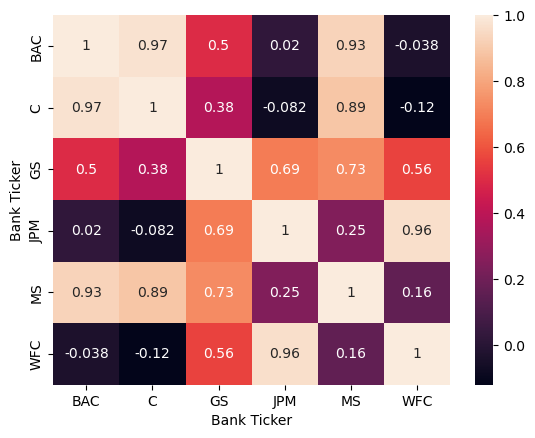

In [107]:
plt.show()

In [109]:
#cluster map
sns.clustermap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

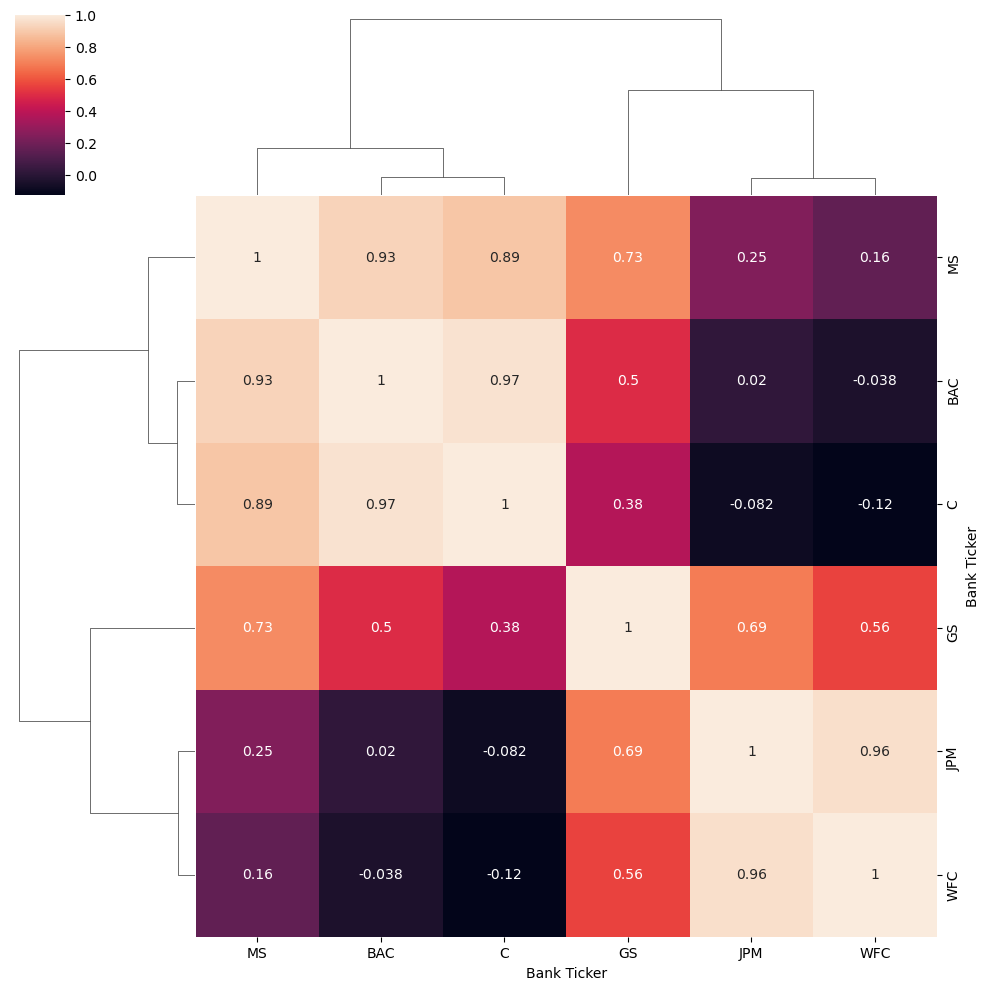

In [111]:
plt.show()

In [113]:
close_corr = bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr()
close_corr

Bank Ticker,BAC,C,GS,JPM,MS,WFC
Bank Ticker,,,,,,
BAC,1.000000,0.970862,0.499725,0.019835,0.927576,-0.038152
C,0.970862,1.000000,0.376065,-0.081897,0.888668,-0.121581
GS,0.499725,0.376065,1.000000,0.691696,0.729949,0.557882
JPM,0.019835,-0.081897,0.691696,1.000000,0.245861,0.961907
MS,0.927576,0.888668,0.729949,0.245861,1.000000,0.159574
WFC,-0.038152,-0.121581,0.557882,0.961907,0.159574,1.000000


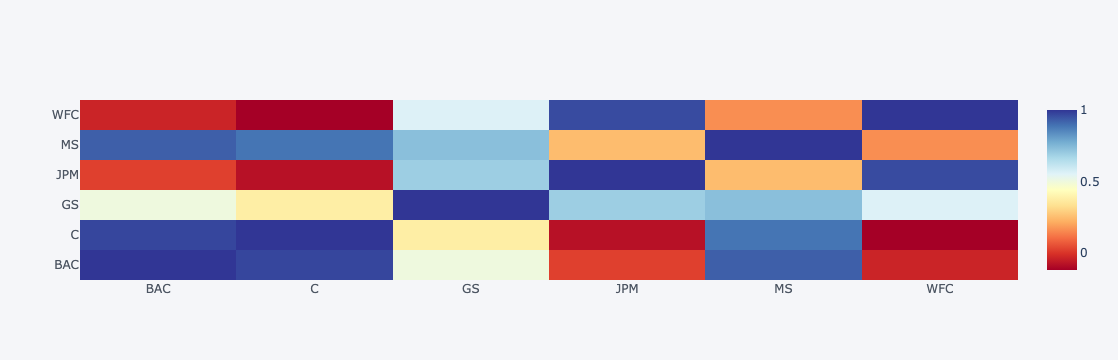

In [117]:
close_corr.iplot(kind='heatmap',colorscale='rdylbu')

In [119]:
#use iplot(kind='candle') to create a candle plot of bank of america stock from Jan1st 2015 to Jan 1st 2016
BAC

,Open,High,Low,Close,Volume
Date,,,,,
2006-01-03,39.4871,39.7023,38.8390,39.6217,1.936396e+07
2006-01-04,39.5549,39.7592,39.0904,39.2004,2.110031e+07
2006-01-05,39.2004,39.4126,38.9834,39.2525,1.761312e+07
2006-01-06,39.3850,39.4774,39.0089,39.1917,1.496529e+07
2006-01-09,39.3182,39.5294,39.0158,39.2181,1.855918e+07
...,...,...,...,...,...
2015-12-24,15.0495,15.1035,14.9630,15.0063,3.380344e+07
2015-12-28,14.9630,14.9720,14.7539,14.8846,4.803435e+07
2015-12-29,14.9897,15.0780,14.9130,15.0131,5.251059e+07


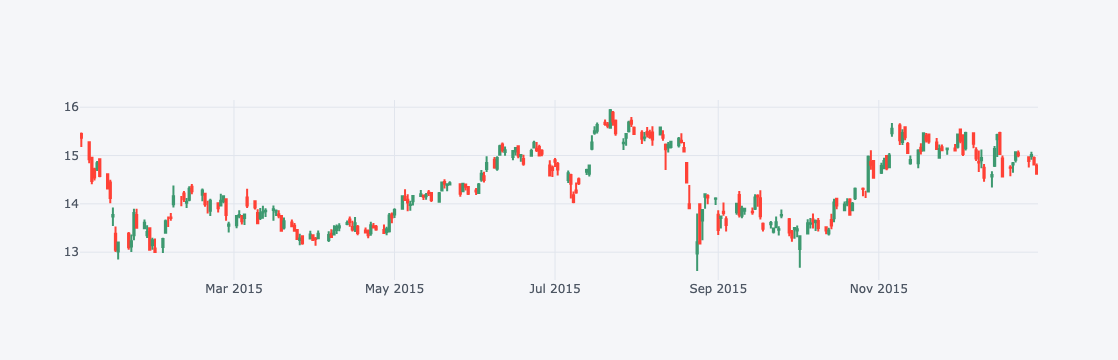

In [123]:
bac15 = BAC[['Open','High','Low','Close']].loc['2015-01-01':'2016-01-01']
bac15.iplot(kind='candle')

/opt/anaconda3/lib/python3.12/site-packages/cufflinks/plotlytools.py:117: FutureWarning:

DatetimeIndex.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.

/opt/anaconda3/lib/python3.12/site-packages/cufflinks/plotlytools.py:117: FutureWarning:

DatetimeIndex.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.



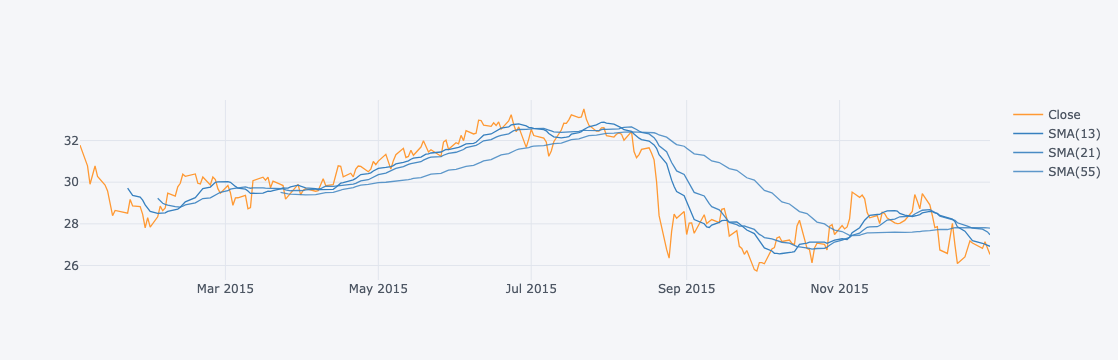

In [127]:
#simple moving avg plot of morgan stanleey for the year 2015
MS = MS.sort_index()

MS['Close'].loc['2015-01-01':'2016-01-01'].ta_plot(study='sma',periods=[13,21,55])

/opt/anaconda3/lib/python3.12/site-packages/cufflinks/plotlytools.py:117: FutureWarning:

DatetimeIndex.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.

/opt/anaconda3/lib/python3.12/site-packages/cufflinks/plotlytools.py:117: FutureWarning:

DatetimeIndex.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.



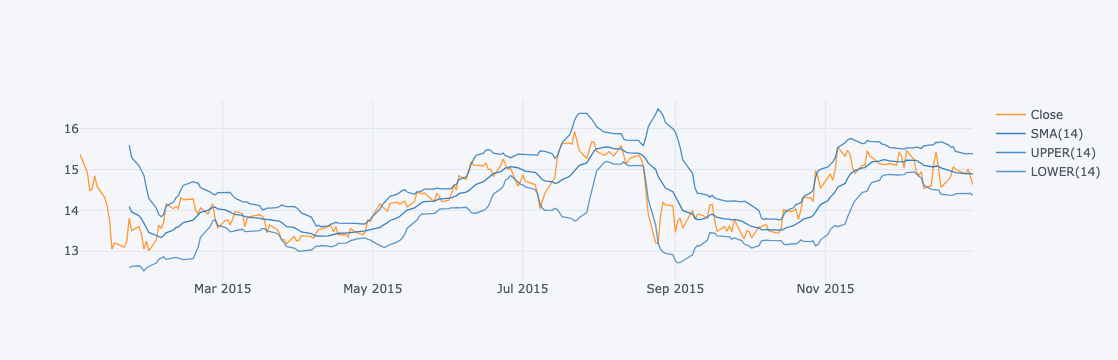

In [129]:
#create a Bollinger Band plot for Bank of America for the year 2015
BAC['Close'].loc['2015-01-01':'2016-01-01'].ta_plot(study='boll')